In [60]:
## importing basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [61]:
## Reading a file
cust_df= pd.read_csv("Customers.csv")

In [62]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
cust_df.head(1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [64]:
x_train= cust_df.iloc[:,[3,4]]
x_train.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Silhouette_score  measure goddness of cluster ,value range between -1 to 1
### -1 means clusters are assigned in wrong way
### 0 clusters are indifferent, clustering is not significant
### 1 means clusters are cleary distinguishable



In [73]:
## import Kmeans library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5270287298101395, 0.4542672407598942, 0.4592339450478494, 0.44096594426188596]


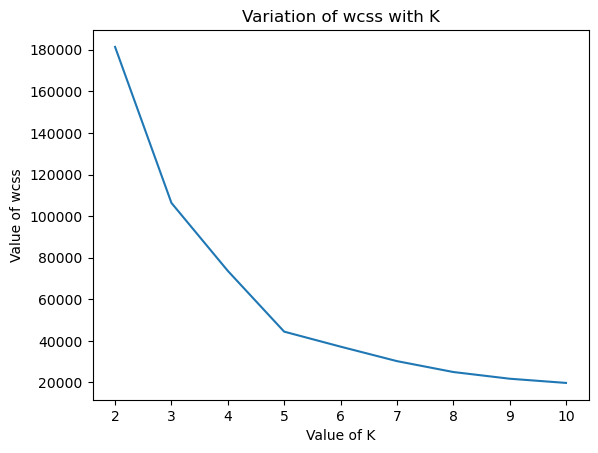

In [66]:
wcss=[]
sil_avg=[]
for i in range(2,11):
    Kmean=KMeans(n_clusters=i)
    clus_label=Kmean.fit_predict(x_train)
    wcss.append(Kmean.inertia_)
    ss=silhouette_score(x_train, clus_label)
    sil_avg.append(ss)
print(sil_avg)
plt.plot(range(2,11), wcss)
plt.xlabel("Value of K")
plt.ylabel("Value of wcss")
plt.title("Variation of wcss with K")
plt.show()
    

In [67]:
kmean= KMeans(n_clusters=5, init="k-means++")
kmean.fit(x_train)
y_pred= kmean.predict(x_train)


In [68]:
center=kmean.cluster_centers_
center

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

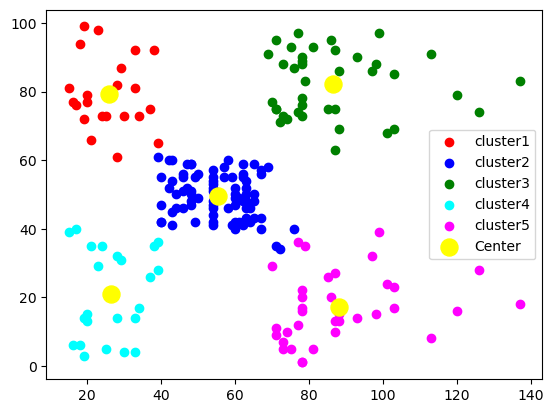

In [72]:
plt.scatter(x_train.iloc[y_pred==0, 0], x_train.iloc[y_pred==0, 1], c='red', label="cluster1")
plt.scatter(x_train.iloc[y_pred==1, 0], x_train.iloc[y_pred==1, 1], c='blue', label="cluster2")
plt.scatter(x_train.iloc[y_pred==2, 0], x_train.iloc[y_pred==2, 1], c='green', label="cluster3")
plt.scatter(x_train.iloc[y_pred==3, 0], x_train.iloc[y_pred==3, 1], c='cyan', label="cluster4")
plt.scatter(x_train.iloc[y_pred==4, 0], x_train.iloc[y_pred==4, 1], c='magenta', label="cluster5")
plt.scatter(center[:,0], center[:,1],s =150, c='yellow', label="Center")
plt.legend()
plt.show()